In [85]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

# Understanding the Data

# DATA DESCRIPTION (Target: exam_score)
| **Feature**                  | **Description**                                               | **Unit / Scale**                                                |
| ---------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------- |
| **student_id**                      | Unique identifier assigned to each student                                          | Integer(ID)                                                           |
| **age**                | Age of the student                       | Years                                         |
| **gender**           | Gender identity                                 | Categorical: *male / female / other*   |
| **course**                | Academic program (B.Tech, B.Sc, B.Com, etc.)                           | Categorical                                                   |
| **study_hours**               | Daily study duration                          | Hours (float) |
| **class_attendance**         | Attendance percentage                  | Percentage(%)                                            |
| **internet_access**                | Availability of internet                           | Categorical: *Yes / No*                      |
| **sleep_hours**           | Daily sleep duration                   | Hours (float)                                                     |
| **sleep_quality**            | Quality of sleep (Poor/Average/Good)                         | Ordinal: *poor / average / good*                                              |
| **study_method**           | Primary study technique                          | Ordinal: *low / medium / high*                                                    |
| **facility_rating**  | Rating of the learning facilities                     | Ordinal: *low / medium / high*                           |
| **exam_difficulty**                   | Difficulty level of the exam                                       | Ordinal: *easy / moderate / hard*                                     |
| **exam_score**               | Final score obtained by the student in the exam.                                              | Numeric (float)                                                    |


## Data Understanding

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/feylinc/DataMining_Feylin/refs/heads/main/Exam_Score_Prediction.csv')
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [88]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [89]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

## Data Preparation

In [90]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'student_id': array([    1,     2,     3, ..., 19999, 20000, 20001], dtype=int64),
 'age': array([17, 23, 22, 20, 18, 21, 24, 19], dtype=int64),
 'gender': array(['male', 'other', 'female'], dtype=object),
 'course': array(['diploma', 'bca', 'b.sc', 'b.tech', 'bba', 'ba', 'b.com'],
       dtype=object),
 'study_hours': array([2.78, 3.37, 7.88, 0.67, 0.89, 3.48, 1.35, 5.48, 2.89, 6.77, 5.99,
        3.77, 6.76, 0.81, 4.65, 4.84, 1.97, 0.4 , 4.28, 4.11, 5.23, 1.7 ,
        1.44, 7.82, 0.91, 7.91, 5.76, 5.03, 2.72, 6.94, 7.28, 5.78, 5.68,
        3.95, 0.62, 0.12, 3.96, 2.94, 6.21, 5.89, 5.02, 0.6 , 1.89, 0.75,
        7.83, 1.02, 7.74, 0.9 , 6.9 , 4.6 , 6.65, 5.07, 6.15, 5.85, 2.08,
        7.48, 5.15, 1.62, 2.45, 4.26, 7.05, 6.37, 2.42, 5.51, 0.08, 2.66,
        6.72, 1.21, 2.83, 0.19, 1.17, 3.92, 7.2 , 0.68, 6.96, 5.35, 2.32,
        1.55, 6.31, 5.8 , 2.44, 0.43, 5.04, 0.72, 4.29, 4.9 , 5.5 , 1.  ,
        3.68, 3.71, 6.68, 3.75, 3.25, 0.99, 5.56, 4.96, 5.74, 5.25, 7.  ,
        7.02,

In [91]:
# Drop student_id because it's only an identifier.

df = df.drop(columns=['student_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


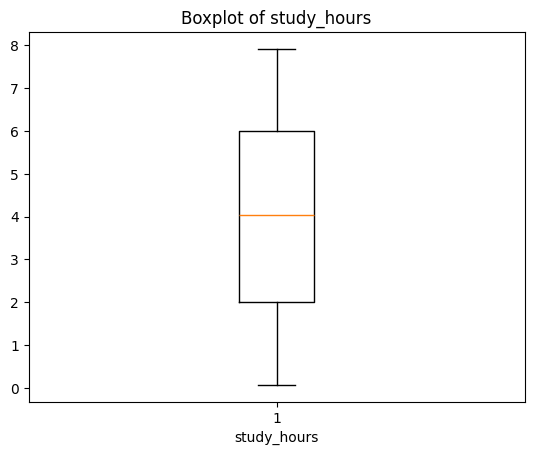

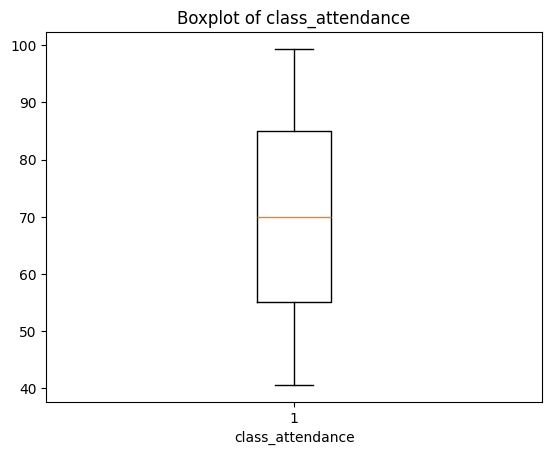

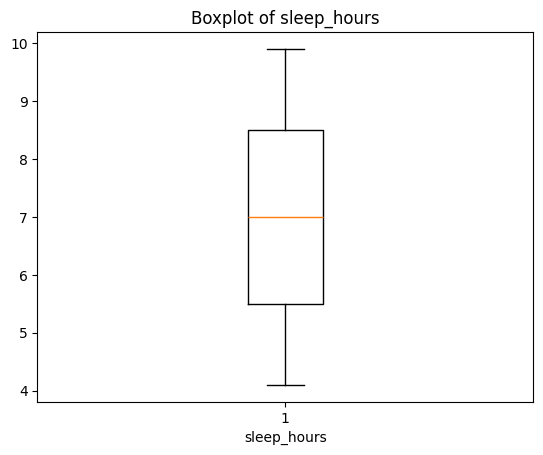

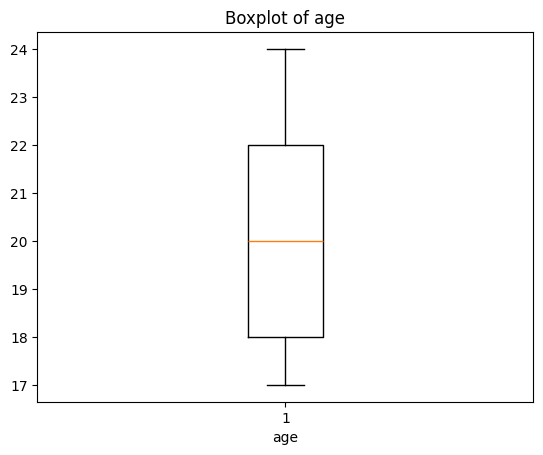

In [92]:
import matplotlib.pyplot as plt

numerical_cols = [
    'study_hours',
    'class_attendance',
    'sleep_hours',
    'age'
]

for col in numerical_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


There are no outliers!

Overall, the boxplots show that the students in this dataset have consistent but varied study and lifestyle patterns. Study hours have a median of around 4 hours, with most students studying between roughly 2 and 6 hours, indicating moderate study effort with no extreme outliers. Class attendance is relatively high, with a median near 70% and an interquartile range from about 55% to 85%, suggesting that most students attend classes regularly, though some have notably lower attendance. Sleep hours are well centered around 7 hours, with the majority of students sleeping between approximately 5.5 and 8.5 hours, which aligns with generally healthy sleep patterns. Lastly, age is tightly distributed, with a median around 20 years and a narrow range (around 17–24 years), indicating a relatively homogeneous student population in terms of age.

## Exploratory Data Analysis

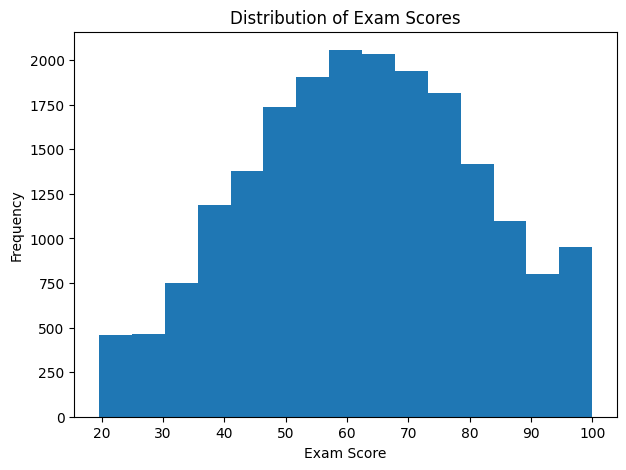

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.hist(df['exam_score'], bins=15)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

The histogram shows that exam scores are approximately bell-shaped and centered around the mid-range, with the highest concentration of students scoring between about 50 and 75, and a clear peak around the 60–65 range. This suggests that most students achieve average to moderately high performance, while very low scores (below 30) and very high scores (above 90) are relatively rare. The distribution appears fairly symmetric, indicating a balanced assessment difficulty where scores are well spread across students rather than clustered at the extremes. Overall, this pattern suggests that the exam effectively differentiates student performance across the population.

<Figure size 700x500 with 0 Axes>

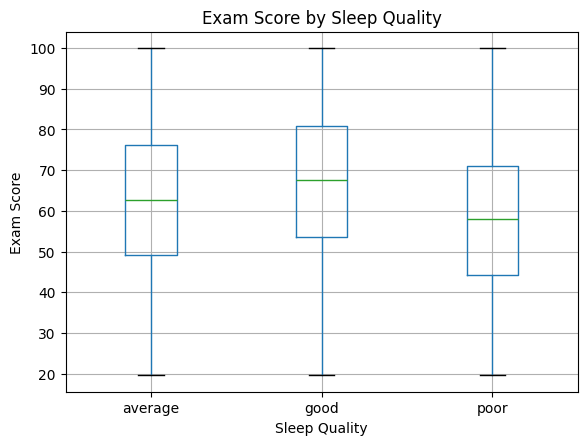

In [94]:
plt.figure(figsize=(7,5))
df.boxplot(column='exam_score', by='sleep_quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Exam Score')
plt.title('Exam Score by Sleep Quality')
plt.suptitle('')
plt.show()

The boxplot indicates a clear relationship between sleep quality and exam performance. Students with good sleep quality tend to achieve the highest exam scores, with a higher median and upper quartile compared to the other groups, suggesting better overall performance. Those with average sleep quality show moderate exam scores, while students reporting poor sleep quality generally have the lowest median scores and a slightly wider spread toward lower values. Although there is overlap in score ranges across all categories, the upward shift in the distribution from poor to average to good sleep quality suggests that better sleep quality is associated with improved exam outcomes.

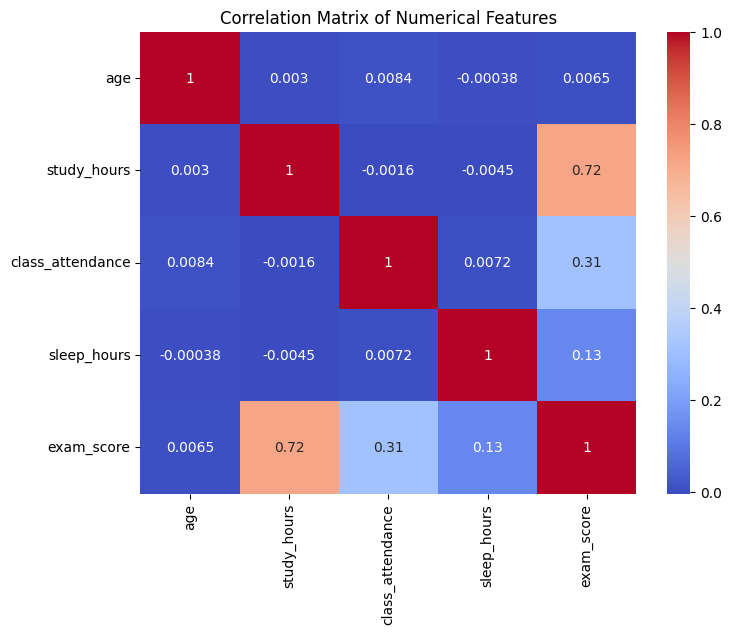

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = [
    'age',
    'study_hours',
    'class_attendance',
    'sleep_hours',
    'exam_score'
]

corr = df[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The correlation matrix shows that study hours have a strong positive relationship with exam score (r ≈ 0.72), indicating that students who spend more time studying tend to achieve significantly higher exam results. Class attendance has a moderate positive correlation with exam score (r ≈ 0.31), suggesting that attending classes regularly also contributes to better performance, though to a lesser extent than study hours. Sleep hours display a weak positive correlation with exam score (r ≈ 0.13), implying that adequate sleep may support performance but is not a dominant factor on its own. In contrast, age shows virtually no correlation with exam score or other variables, indicating that age does not meaningfully influence academic performance in this dataset. Overall, the results highlight study effort and engagement as the most influential numerical factors for exam outcomes.

## Feature Engineering

In [96]:
for column in ['gender', 'course', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']:
  print(df[column].unique())

['male' 'other' 'female']
['diploma' 'bca' 'b.sc' 'b.tech' 'bba' 'ba' 'b.com']
['poor' 'average' 'good']
['coaching' 'online videos' 'mixed' 'self-study' 'group study']
['low' 'medium' 'high']
['hard' 'moderate' 'easy']


In [97]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pprint

df_encoded = df.copy()

cat_cols = [
    'gender',
    'course',
    'sleep_quality',
    'study_method',
    'facility_rating',
    'exam_difficulty',
    'internet_access'
]

for col in cat_cols:
    df_encoded[col] = (
        df_encoded[col]
        .astype(str)
        .str.strip()
        .str.lower()
    )

one_hot_map = {
    'internet_access': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

nominal_cols = [
    'gender',
    'course',
    'sleep_quality',
    'study_method',
    'facility_rating',
    'exam_difficulty'
]

encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])
df_encoded[nominal_cols] = df_encoded[nominal_cols].astype(int)

encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {
        category: int(code)
        for code, category in enumerate(cats)
    }

df_encoded.sample(n=5)

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
2400,17,2,6,2.61,83.8,1,7.9,2,3,2,2,51.4
13980,24,0,5,7.19,70.7,1,9.4,1,2,2,2,84.8
13751,21,1,5,2.12,70.2,1,7.3,0,3,2,1,52.5
1514,18,2,1,2.71,72.9,1,5.7,1,4,0,2,60.4
1559,23,0,5,0.93,68.1,1,9.5,2,4,1,2,43.1


In [98]:
def score_category(score):
    if score < 60:
        return 0   # Low
    elif score < 75:
        return 1   # Medium
    else:
        return 2   # High

df_encoded['exam_category'] = df_encoded['exam_score'].apply(score_category)

In [99]:
X = df_encoded.drop(['exam_category', 'exam_score'], axis=1)

y = df_encoded['exam_category']

In [100]:
X.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
0,17,1,6,2.78,92.9,1,7.4,2,0,1,1
1,23,2,5,3.37,64.8,1,4.6,0,3,2,2
2,22,1,1,7.88,76.8,1,8.5,2,0,0,2
3,20,2,6,0.67,48.4,1,5.8,0,3,1,2
4,20,0,6,0.89,71.6,1,9.8,2,0,1,2


In [101]:
y.head()

0    0
1    0
2    2
3    0
4    0
Name: exam_category, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [103]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((15000, 11), (5000, 11))

In [104]:
X_train.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
18960,24,0,4,5.20,92.3,1,9.5,1,1,2,2
11353,18,2,6,6.11,92.5,1,4.1,1,2,0,0
7449,23,2,6,6.14,78.1,0,8.3,2,0,0,2
14308,24,0,4,3.90,99.1,0,4.5,2,2,1,0
11889,17,1,4,5.05,82.0,1,6.3,2,2,1,1


In [105]:
X_test.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
11456,20,1,6,7.58,74.0,0,6.8,2,0,0,1
16528,24,1,4,2.22,96.4,1,5.9,1,1,0,2
3253,19,1,0,2.37,83.3,1,4.1,2,2,0,1
18614,21,0,0,6.38,41.7,1,5.9,2,0,1,2
1544,18,1,5,0.48,54.0,0,6.3,2,4,1,0


# Prediction Model Development

## Model Implementation

## Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6771
           1       1.00      1.00      1.00      4161
           2       1.00      1.00      1.00      4068

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2182
           1       0.38      0.38      0.38      1433
           2       0.61      0.61      0.61      1385

    accuracy                           0.59      5000
   macro avg       0.57      0.57      0.57      5000
weighted avg       0.59      0.59      0.59      5000



## Oversampling With SMOTENC

In [107]:
# using SMOTE-NC for dataset containing numerical and categorical features.
from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'gender',
    'course',
    'internet_access',
    'sleep_quality',
    'study_method',
    'facility_rating',
    'exam_difficulty'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((20144, 11), (6715, 11))

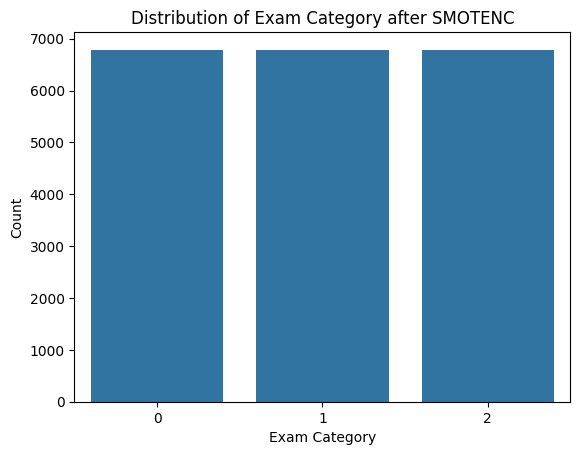

In [108]:
X_train_smote, y_train_smote = smotenc.fit_resample(X_train, y_train)
sns.countplot(x=y_train_smote)
plt.title('Distribution of Exam Category after SMOTENC')
plt.xlabel('Exam Category')
plt.ylabel('Count')
plt.show()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


## Decision Tree After SMOTENC

In [110]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6690
           1       1.00      1.00      1.00      6665
           2       1.00      1.00      1.00      6789

    accuracy                           1.00     20144
   macro avg       1.00      1.00      1.00     20144
weighted avg       1.00      1.00      1.00     20144


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2263
           1       0.55      0.56      0.55      2288
           2       0.70      0.71      0.71      2164

    accuracy                           0.65      6715
   macro avg       0.65      0.65      0.65      6715
weighted avg       0.65      0.65      0.65      6715



## XGBoost After SMOTENC

In [111]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',   # multiclass classification
    num_class=3,                 # Low, Medium, High
    n_estimators=800,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist'           # faster & stable
)

# Train
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=100
)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[0]	validation_0-mlogloss:1.07588
[100]	validation_0-mlogloss:0.62259
[200]	validation_0-mlogloss:0.59109
[300]	validation_0-mlogloss:0.58394
[400]	validation_0-mlogloss:0.58140
[500]	validation_0-mlogloss:0.58088
[600]	validation_0-mlogloss:0.58282
[700]	validation_0-mlogloss:0.58656
[799]	validation_0-mlogloss:0.59089
Accuracy: 0.7575577066269545

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2263
           1       0.67      0.66      0.67      2288
           2       0.80      0.83      0.81      2164

    accuracy                           0.76      6715
   macro avg       0.76      0.76      0.76      6715
weighted avg       0.76      0.76      0.76      6715


Confusion Matrix:
[[1778  420   65]
 [ 374 1521  393]
 [  32  344 1788]]


## KFold Cross Validation

In [112]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in skf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 21487, Test set:5372
Fold:2, Train set: 21487, Test set:5372
Fold:3, Train set: 21487, Test set:5372
Fold:4, Train set: 21487, Test set:5372
Fold:5, Train set: 21488, Test set:5371


### Decision Tree

In [113]:
from sklearn.model_selection import GridSearchCV

dt_base = Pipeline([
    ('smote', SMOTENC(
        categorical_features=categorical_features,
        random_state=42
    )),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    'model__max_depth': [3, 5, 7, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['gini', 'entropy']
}

dt_tuned = GridSearchCV(
    dt_base,
    param_grid=dt_param_grid,
    scoring='f1_macro',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

dt_tuned.fit(X, y)

print("Decision Tree Tuned F1:", dt_tuned.best_score_)
print("Best params:", dt_tuned.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Decision Tree Tuned F1: 0.6764725562034755
Best params: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_split': 2}


### XGBoost

In [114]:
from xgboost import XGBClassifier

xgb_tuned = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

xgb_tuned_scores = cross_val_score(
    xgb_tuned, X, y, cv=skf, scoring='f1_macro'
)

print("XGBoost (Tuned) F1:", xgb_tuned_scores.mean())


XGBoost (Tuned) F1: 0.7401750488967198


## Feature Importance

In [115]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.05830017 0.03263096 0.05686128 0.36118175 0.19690484 0.0129095
 0.11186372 0.04182775 0.06142549 0.0424828  0.02361175]


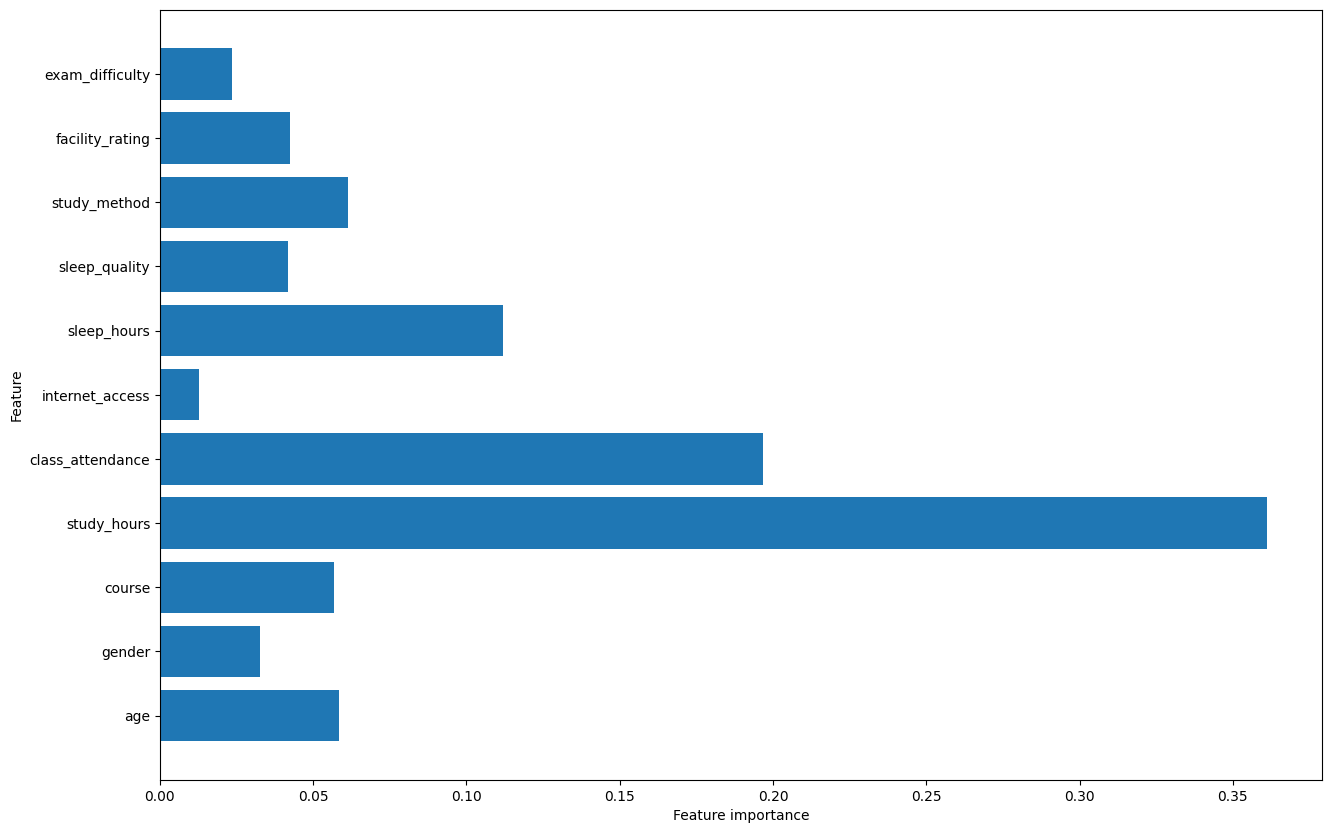

In [116]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [117]:
# Show feature importances (top 8 features)
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances.sort_values(ascending=False).head(8)
important_features


study_hours         0.361182
class_attendance    0.196905
sleep_hours         0.111864
study_method        0.061425
age                 0.058300
course              0.056861
facility_rating     0.042483
sleep_quality       0.041828
dtype: float64

In [118]:
# using only important features for the prediction
important_features = ["study_hours", "class_attendance", "sleep_hours", "study_method", "age", "course", "sleep_quality", "facility_rating"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['exam_category'] #target

In [119]:
display(X_importance)
display(y_importance)

,study_hours,class_attendance,sleep_hours,study_method,age,course,sleep_quality,facility_rating
0,2.78,92.9,7.4,0,17,6,2,1
1,3.37,64.8,4.6,3,23,5,0,2
2,7.88,76.8,8.5,0,22,1,2,0
3,0.67,48.4,5.8,3,20,6,0,1
4,0.89,71.6,9.8,0,20,6,2,1
...,...,...,...,...,...,...,...,...
19995,6.50,71.3,5.0,4,18,4,1,1
19996,3.71,41.6,5.9,0,18,0,0,2
19997,7.88,68.2,4.6,1,19,6,2,1
19998,4.60,76.3,6.1,4,19,4,1,2


0        0
1        0
2        2
3        0
4        0
        ..
19995    2
19996    1
19997    1
19998    2
19999    1
Name: exam_category, Length: 20000, dtype: int64

In [120]:
categorical_features = [
    X_importance.columns.get_loc(col)
    for col in ['study_method', 'course', 'sleep_quality', 'facility_rating']
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=0, stratify=y_importance
)

X_train.shape, X_test.shape

((18801, 8), (8058, 8))

### Decision Tree

In [121]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6270
           1       1.00      1.00      1.00      6209
           2       1.00      1.00      1.00      6322

    accuracy                           1.00     18801
   macro avg       1.00      1.00      1.00     18801
weighted avg       1.00      1.00      1.00     18801


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2683
           1       0.53      0.54      0.54      2744
           2       0.70      0.71      0.70      2631

    accuracy                           0.65      8058
   macro avg       0.65      0.65      0.65      8058
weighted avg       0.65      0.65      0.65      8058



### XGBoost

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(
    X_importance,
    y_importance,
    test_size=0.3,
    random_state=42,
    stratify=y_importance
)

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    max_depth=6,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train_importance, y_train_importance)

xgb_importance = pd.Series(
    xgb_model.feature_importances_,
    index=X_train_importance.columns
).sort_values(ascending=False)

xgb_importance

y_pred_train_xgb = xgb_model.predict(X_train_importance)
y_pred_test_xgb = xgb_model.predict(X_test_importance)

print("\n=== XGBoost Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_xgb))

print("\n=== XGBoost Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_xgb))



=== XGBoost Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6267
           1       0.81      0.83      0.82      6267
           2       0.89      0.90      0.89      6267

    accuracy                           0.87     18801
   macro avg       0.87      0.87      0.87     18801
weighted avg       0.87      0.87      0.87     18801


=== XGBoost Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2686
           1       0.62      0.64      0.63      2686
           2       0.79      0.78      0.79      2686

    accuracy                           0.74      8058
   macro avg       0.74      0.74      0.74      8058
weighted avg       0.74      0.74      0.74      8058



## Hyperparameter Tuning using Grid Search

### Decision Tree

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dtree_clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dtree_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'   # ✅ FIX
)

grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best CV F1-macro score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV F1-macro score: 0.673


In [124]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      6267
           1       0.67      0.70      0.68      6267
           2       0.81      0.79      0.80      6267

    accuracy                           0.77     18801
   macro avg       0.77      0.77      0.77     18801
weighted avg       0.77      0.77      0.77     18801


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      2686
           1       0.54      0.58      0.56      2686
           2       0.74      0.71      0.73      2686

    accuracy                           0.67      8058
   macro avg       0.68      0.67      0.68      8058
weighted avg       0.68      0.67      0.68      8058



### XGBoost

In [125]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_importance,
    y_importance,
    test_size=0.3,
    random_state=42,
    stratify=y_importance
)

xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)

param_grid_xgb = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [200, 400],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_

print("\nBest XGBoost Parameters:")
print(grid_search_xgb.best_params_)

print("\nBest Cross-Validation F1-macro Score:")
print(f"{grid_search_xgb.best_score_:.3f}")

y_pred_test_xgb = best_xgb.predict(X_test)
print("\n=== XGBoost Tuned Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_xgb))

print("\n=== XGBoost Tuned Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_xgb))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Feylin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:02:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 400, 'subsample': 0.8}

Best Cross-Validation F1-macro Score:
0.748

=== XGBoost Tuned Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      6267
           1       0.81      0.83      0.82      6267
           2       0.89      0.90      0.89      6267

    accuracy                           0.87     18801
   macro avg       0.87      0.87      0.87     18801
weighted avg       0.87      0.87      0.87     18801


=== XGBoost Tuned Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2686
           1       0.65      0.67      0.66      2686
           2       0.80      0.80      0.80      2686

    accuracy                           0.75      8058
   macro avg       0.75      0.75      0.75      8058
wei

## Interpretation and Insights

- The tuned XGBoost model shows the best overall performance, achieving a macro F1-score of 0.748 from cross-validation, which indicates stable performance across all classes.

- On the training set, the model reaches an accuracy of 0.87 with balanced precision, recall, and F1-scores for all three classes, showing that the model learns the data patterns effectively.

- On the test set, the accuracy decreases to 0.75 with a macro F1-score of 0.75, indicating a reasonable generalization gap and no severe overfitting.

- Class 0 and class 2 achieve higher F1-scores on the test data (around 0.79–0.80), while class 1 has a lower F1-score (around 0.66), suggesting that medium-performing students are harder to classify.

- The confusion between class 1 and the other classes indicates overlapping characteristics between students with medium, low, and high performance levels.

- Hyperparameter tuning slightly improves the performance of XGBoost compared to the untuned version, especially in terms of overall stability.

- The Decision Tree model shows perfect accuracy on the training set but performs poorly on the test set, confirming the presence of overfitting.


## Conclusion

- A multiclass classification approach to predict students exam performance using several machine learning models.

- Among all evaluated models, the tuned XGBoost model achieves the best balance between accuracy and generalization, with a macro F1-score of approximately 0.75 on the test data.

- The results show that ensemble-based models are more suitable for this dataset compared to single tree-based models.

- From a practical perspective, the model can be used to support educators in identifying students who may require early academic intervention, particularly those in the medium and low performance categories.
